In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# print(api_key)
# example lat and lon call: api.openweathermap.org/data/2.5/weather?lat=35&lon=139

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

In [3]:
# Removing spaces from the city names and replacing with HTML '%20'
new_city_list = []

for city in cities:
    new_city = city.replace(' ','%20')
    new_city_list.append(new_city)

# API Calls for Cities (Temp, Humidity, Cloudiness, Wind Speed)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# To call latitude and longitude: lat={lat}&lon={lon}
# query_url = f"{url}appid={api_key}&units={units}&lat={lat}&lon={lon}"
# Call with city name
query_url = f"{url}appid={api_key}&units={units}&q={new_city_list}"
# print(query_url)

In [5]:
# lists to hold weather data
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []
lat_list = []


In [6]:
# test_city_list = ["Paris", "London", "Oslo", "Beijing", "Los%20Angeles"]

# Loop to pull weather data on the list of cities

for city in new_city_list:
    response = requests.get(f"{url}appid={api_key}&units={units}&q={city}").json()
    try:
        print(response['name'])
        print(response['id'])
        humidity_list.append(response['main']['humidity'])
        clouds_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        lat_list.append(response['coord']['lat'])
        temp_list.append(response['main']['temp'])
    except KeyError:
        print("Missing field...skipping")
        
    time.sleep(1.5)
    

Fukue
1848373
Poso
1630723
Missing field...skipping
Katsuura
1865309
Provideniya
4031574
Upernavik
3418910
Thompson
6165406
Albany
5106834
Okhotsk
2122605
Saint Anthony
5606187
Vila Franca do Campo
3372472
Nemuro
2128975
Noumea
2139521
Severo-Kurilsk
2121385
Kavieng
2094342
Missing field...skipping
Flinders
6255012
Bluff
2175403
Pangnirtung
6096551
Wladyslawowo
3081752
Mataura
6201424
Aklavik
5882953
Yellowknife
6185377
Missing field...skipping
Ponta do Sol
3453439
Hobart
2163355
Caravelas
3466980
Arraial do Cabo
3471451
San Patricio
3437029
Barrow
3833859
Khatanga
2022572
Clyde River
5924351
Rikitea
4030556
Miyoshi
1856698
Swansea
2636432
Punta Arenas
3874787
Saint-Philippe
6138908
Vaini
1273574
Torbay
6167817
Kapaa
5848280
Coahuayana
3981460
Bathsheba
3374083
Ahipara
2194098
New Norfolk
2155415
Bredasdorp
1015776
Niquero
3545981
Busselton
2075265
Tasiilaq
3424607
Rio Grande
3451138
Isangel
2136825
Keuruu
652977
Natal
3394023
Hilo
5855927
Challapata
3921355
Nome
4732862
Tilichiki
2120

Buin
3897774
Rajkot
1258847
Jardim
3460087
Tamiahua
3516376
Kangaba
2455735
Lelydorp
3383714
Nouadhibou
2377457
Palu
1633034
Gezing
2925080
Kalmunai
1242110
Mangochi
927246
Mayumba
2399001
Sur
286245
Takanabe
1851068
Ugoofaaru
1337619
Pavelets
512255
Grafton
2164771
Tual
1623197
Missing field...skipping
Missing field...skipping
Missing field...skipping
Missing field...skipping
Freeport
3572375
Agadez
2448085
Viedma
3832899
Anadyr
2127202
Sibay
493160
Krasnoarmeysk
542463
Kortkeros
544397
Povenets
505820
Traralgon
2146108
Mareeba
2158767
Zyryanovsk
1516438
Missing field...skipping
Shenjiamen
1795632
Pingdu
1798821
Bethanien
3358416
Solnechnyy
2016307
Rawson
3839307
Quime
3906765
Missing field...skipping
Champerico
3530097
Makakilo City
5850554
Soubre
2598243
Tevriz
1489661
Daru
2098329
Missing field...skipping
Santa Isabel
3996069
Aflao
2365267
Lalsk
537094
Ballina
2966778
Udachnyy
2014624
Paralimni
734330
Pangkalanbuun
1632694
Ust-Tsilma
477940
Tumpat
1736356
Sao Miguel
3627382
Missing

In [7]:
# Create data frame for the cities
weather_dict = {
#     "City": new_city_list,
    "Latitude": lat_list,
    "Temp": temp_list,
    "Humidity": humidity_list,
    "Cloudiness": clouds_list,
    "Wind Speed": wind_list
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,Latitude,Temp,Humidity,Cloudiness,Wind Speed
0,35.03,75.97,73,20,10.29
1,-1.40,68.30,82,94,1.48
2,33.93,73.38,88,75,5.82
3,64.42,51.80,87,75,6.71
4,72.79,42.56,79,100,1.14


In [12]:
# Export to CSV
weather_data.to_csv(r'C:\Users\quaid\Weather_API_Homework\output_data\cities.csv', index = None, header=True)
# r'C:\Users\Ron\Desktop\export_dataframe.csv', index = None, header=True)

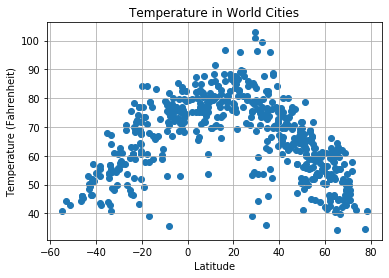

In [18]:
# Create scatterplots off the data frame
plt.scatter(weather_data["Latitude"], weather_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities on 8/23/2019")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
# Export Scatters as PNG
plt.savefig("output_data/temperature.png")

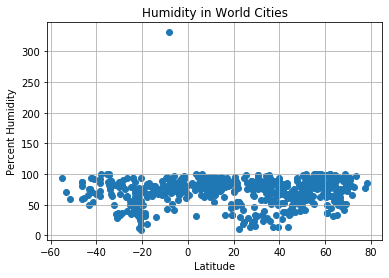

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities 8/23/2019")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Export Scatters as PNG
plt.savefig("output_data/humidity.png")

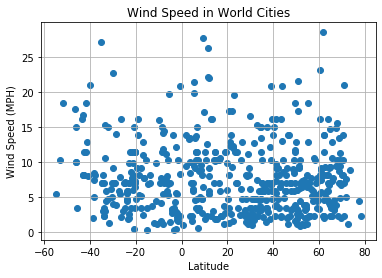

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities 8/23/2019")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
# Export Scatters as PNG
plt.savefig("output_data/wind_speed.png")

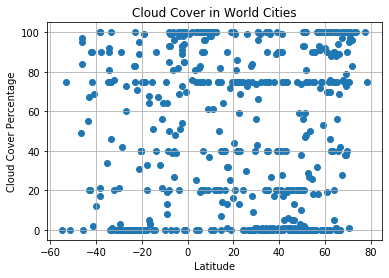

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Cover in World Cities 8/23/201")
plt.ylabel("Cloud Cover Percentage")
plt.xlabel("Latitude")
plt.grid(True)
# Export Scatters as PNG
plt.savefig("output_data/cloud_cover.png")